In [1]:
#Importing relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Getting and reading the data 
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
V1               10 non-null object
V2               10 non-null object
V3               7 non-null object
V4               2 non-null object
V5               1 non-null object
Sixth Sense      10 non-null int64
Gladiator        10 non-null int64
LOTR1            10 non-null int64
Harry Potter1    10 non-null int64
Patriot          10 non-null int64
LOTR2            10 non-null int64
Harry Potter2    10 non-null int64
LOTR             10 non-null int64
Braveheart       10 non-null int64
Green Mile       10 non-null int64
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
#Check for Null values
movies.isnull().any()

V1               False
V2               False
V3                True
V4                True
V5                True
Sixth Sense      False
Gladiator        False
LOTR1            False
Harry Potter1    False
Patriot          False
LOTR2            False
Harry Potter2    False
LOTR             False
Braveheart       False
Green Mile       False
dtype: bool

In [53]:
#Checking the unique values in all the columns.
%timeit
print(movies['V1'].unique())
print(movies['V2'].unique())
print(movies['V3'].unique())
print(movies['V4'].unique())
print(movies['V5'].unique())

['Sixth Sense' 'Gladiator' 'LOTR1' 'Harry Potter1']
['LOTR1' 'Patriot' 'LOTR2' 'Harry Potter2' 'LOTR']
['Harry Potter1' 'Braveheart' nan 'Sixth Sense' 'Gladiator']
['Green Mile' nan]
['LOTR2' nan]


In [51]:
#Check for unique values in all the columns while keeping the mind the intersecting/common values.
%timeit pd.unique(movies[['V1', 'V2','V3','V4','V5']].values.ravel('K'))

548 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
#Creatingn a newdata set which has dummy variables.
movies_new = movies.drop(movies.columns[0:5], axis=1)
movies_new.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [25]:
#importing AS rules package.
from mlxtend.frequent_patterns import apriori,association_rules

In [29]:
#Implementing Apriori Algorithm.
frequent_movies = apriori(movies_new, min_support=0.05, max_len=3, use_colnames=True)
frequent_movies.head(10)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


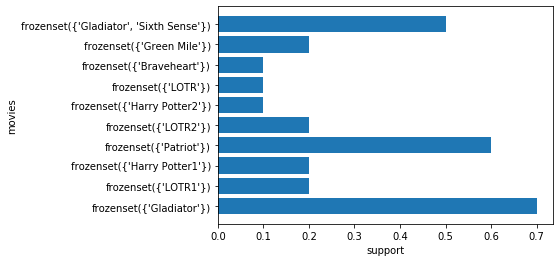

In [40]:
# Creating a graph for visualising the support values of movie sets.
frequent_movies.sort_values('support',ascending=True)
plt.barh(list(range(1,11)),frequent_movies.support[1:11]);
plt.yticks(list(range(1,11)),frequent_movies.itemsets[1:11])
plt.ylabel('movies');plt.xlabel('support')
plt.show()

## Analysing Association rules on lift metric

In [41]:
# Association rules by using the above support DataFrame.
rules = association_rules(frequent_movies, metric='lift', min_threshold=1 )
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
95,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
123,(Green Mile),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
70,"(Sixth Sense, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
31,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
94,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
87,(Green Mile),"(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
86,(LOTR),"(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.0,0.08,inf
83,"(Sixth Sense, Green Mile)",(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
82,"(Sixth Sense, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


## Analysing the association rules on Confidence Metric with changed Algorithm values

In [44]:
#Changing values in Apriori Algorithm to understand it's working for different rules.

frequent_movies_new = apriori(movies_new, min_support=0.005, use_colnames=True)
frequent_movies_new.sort_values('support', ascending=False).head(10)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Sixth Sense, Patriot)"
13,0.4,"(Patriot, Sixth Sense)"
9,0.2,(Green Mile)
22,0.2,"(LOTR2, LOTR1)"
16,0.2,"(Sixth Sense, Green Mile)"


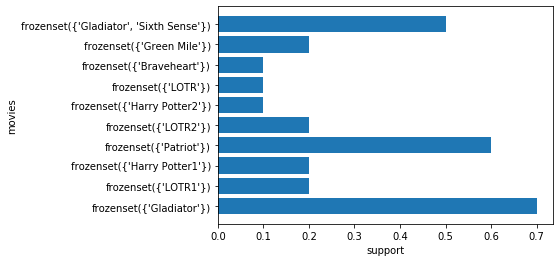

In [50]:
frequent_movies_new.sort_values('support',ascending=True)
plt.barh(list(range(1,11)),frequent_movies_new.support[1:11]);
plt.yticks(list(range(1,11)),frequent_movies.itemsets[1:11])
plt.ylabel('movies');plt.xlabel('support')
plt.show()

In [48]:
rules = association_rules(frequent_movies_new, metric='confidence', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf


In [49]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
79,"(LOTR2, LOTR1, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
92,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
91,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
89,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
88,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
87,"(LOTR2, Green Mile, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
86,"(Sixth Sense, Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf
85,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf


## Analysing Association rules on Lift metric with changed algo values

In [60]:
frequent_movies_final = apriori(movies_new, min_support=0.005, use_colnames=True)
frequent_movies_final.sort_values('support',ascending=False).head(10)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Sixth Sense, Patriot)"
13,0.4,"(Patriot, Sixth Sense)"
9,0.2,(Green Mile)
22,0.2,"(LOTR2, LOTR1)"
16,0.2,"(Sixth Sense, Green Mile)"


In [61]:
rules_final = association_rules(frequent_movies_final, metric='lift', min_threshold=1)
rules_final.sort_values('lift', ascending=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
44,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
36,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
33,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
32,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
37,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
